# Genrating synthetic temporal data 
Inorder to show the application of recurrent neural networks (RNNs) we need data that is only correctly predicted when a memory of past events is present.

We will build data were predicting the next frame is ambigious given a single instance, but is predictable when multiple chronological instances are used.  

## The data
The data will of a moving box:
![box data](images/box.gif)

## The Task
To predict the next position of the box:
![box predict](images/box_predict.png)

## The need for temporal memory in predicting the box
As you can probebly see, the next position of the box is abigious based on a single frame, i.e you have no gauranteed way of correctly predicting the direction of the box based on a single frame:
![box predict](images/abig_predict.png)

**However** if your model maintains a memory of the previous input, it can use that information to predict correctly:
![box memory](images/temp_box.png)

This is what an RNN does.

Lets create this synthetic data:

### Inport libraries

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageDraw

In [5]:
FRAME_SIZE = [5,60]
BOX_WIDTH = 3
DATA_POINTS = 200

In [6]:
def get_rect(x, y, width, height):
    rect = np.array([(0, 0), (width-1, 0), (width-1, height-1), (0, height-1), (0, 0)])
    offset = np.array([x, y])
    transformed_rect = rect + offset
    return transformed_rect

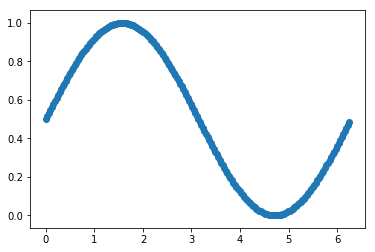

In [7]:
base = (np.arange(DATA_POINTS)/DATA_POINTS)* 2 *np.pi
sined = (np.sin(base) + 1 )/2
plt.scatter(base, sined)
plt.show()

In [8]:
def get_array_with_box_at_pos(x):
    img = Image.fromarray(data)
    draw = ImageDraw.Draw(img)
    rect = get_rect(x=x, y=1, width=BOX_WIDTH, height=BOX_WIDTH)
    draw.polygon([tuple(p) for p in rect], fill=1)
    new_data = np.asarray(img)
    return new_data

In [9]:
data = np.zeros(FRAME_SIZE)

In [11]:
sway_offset = 1
sway_start = sway_offset
sway_end = (data.shape[1]-1) - BOX_WIDTH
sway_range = sway_end - sway_offset
sway_start, sway_end, sway_range

(1, 56, 55)

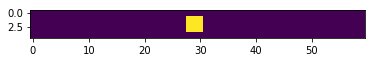

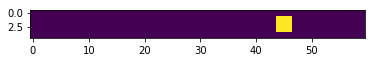

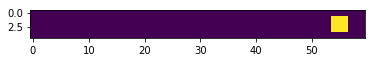

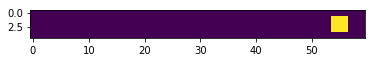

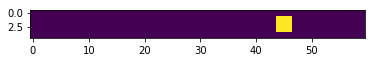

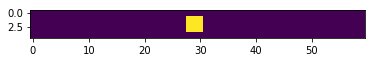

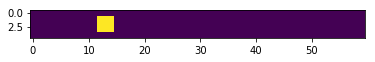

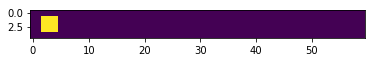

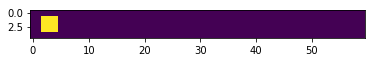

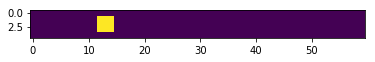

In [17]:
frames = []
print_every_n_frames = DATA_POINTS//10
for i,t in enumerate(sined):
    frame = get_array_with_box_at_pos((t*sway_range)+sway_offset)
    if(i % print_every_n_frames)==0:
        plt.imshow(frame, interpolation='nearest')
        plt.show()
    frames.append(frame)